{% include toc title="In This Chapter" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this chapter, you will be able to:

* Import a time series dataset using **pandas** with dates converted to a `datetime` object in **Python**.
* Use the `datetime` object to create easier-to-read time series plots and work with data across various timeframes (e.g. daily, monthly, yearly) in **Python**.
* Explain the role of "no data" values and how the `NaN` value is used in **Python** to label "no data" values.
* Set a "no data" value for a file when you import it into a **pandas** dataframe. 

</div>


## Dive Deeper Into Working With Datetime Objects in Python

On this page, you will learn how to handle dates using the `datetime` object in **Python** with **pandas**, using a dataset of daily temperature (maximum in Fahrenheit) and total precipitation (inches) in July 2018 for Boulder, CO, provided by the <a href="https://www.esrl.noaa.gov/psd/boulder/data/boulderdaily.complete" target="_blank">National Oceanic and Atmospheric Administration (NOAA)</a>.


### Import Packages and Get Data

To begin, import the necessary packages to work with **pandas** dataframe and download data. You will work with modules from **pandas** and **matplotlib** to plot dates more efficiently, and you will work with the <a href="https://seaborn.pydata.org/introduction.html" target="_blank">**seaborn**</a> package to make more attractive plots.  

In [1]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
file_url = "https://ndownloader.figshare.com/files/12948515"
et.data.get_data(url=file_url)

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file
file_path = os.path.join("data", "earthpy-downloads",
                         "july-2018-temperature-precip.csv")

# Import file into pandas dataframe
boulder_july_2018 = pd.read_csv(file_path)

In [3]:
# Display first few rows
boulder_july_2018.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [4]:
# View dataframe info
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
date        31 non-null object
max_temp    31 non-null int64
precip      31 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


### View Data Types in Pandas Dataframes

Now that you have imported the data into a **pandas** dataframe, you can query the data types of the columns in the dataframe using the dataframe attribute `.dtypes`. 

In [5]:
# View column data types
boulder_july_2018.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

The `.dtypes` attribute indicates that the data columns in your **pandas** dataframe are stored as several different data types as follows:

* **date as object:** A string of characters that are in quotes. 
* **max_temp as int64** 64 bit integer. This is a numeric value that will never contain decimal points.
* **precip as float64 - 64 bit float:**  This data type accepts data that are a wide variety of numeric formats including decimals (floating point values) and integers. Numeric also accept larger numbers than **int** will.

Investigate the data type in the `date` column further to see the data type or class of information it contains.

In [6]:
# Check data type of first value in date column
type(boulder_july_2018['date'][0])

str

Notice that while you may see this column as a date, **Python** stores the values as a type `str` or string. 

### Plot Dates as Strings

To understand why using `datetime` objects can help you to create better plots, begin by creating a standard plot using **matplotlib**, based on the `date` column (as a string) and the `max_temp` column.

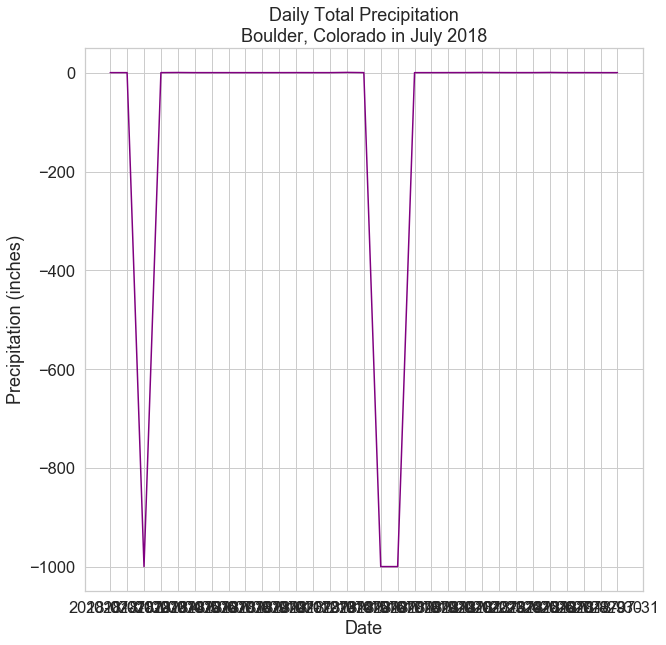

In [7]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(boulder_july_2018['date'],
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

First, you will notice that there are many negative values in this dataset - these are actually "no data" values that you will handle in a later section on this page. 

Now, look closely at the dates on the x-axis. When you plot a string field for the x-axis, `Python` gets stuck trying to plot the all of the date labels. Each value is read as a string, and it is difficult to try to fit all of those values on the x axis efficiently. 

You can avoid this problem by converting the dates from strings to a `datetime` object during the import of data into a **pandas** dataframe. Once the dates are converted to a `datetime` object, you can more easily customize the dates on your plot, resulting in a more visually appealing plot. 


## Import Date Column into Pandas Dataframe As Datetime Object

To import the dates as a `datetime` object, you can use the `parse_dates` parameter of the `pd.read_csv()` function that allows you to indicate that a particular column should be converted to a `datetime` object:

`parse_dates = ['date_column']`

If you have a single column that contain dates in your data, you can also set dates as the index for the dataframe using the `index_col` parameter: 

`index_col = ['date_column']`

You will use this index in later lessons to allow you to quickly summarize and aggregate your data by date. 

Now you can recreate the dataframe using the parameter `parse_dates`to convert the dates from strings to `datetime` values and `index_col` to set the index of the dataframe to the `datetime` values.

In [8]:
# Import data using datetime and set index to datetime
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,-999.00
2018-07-04,87,0.00
2018-07-05,84,0.24


Notice that during the import, you converted the column `date` to the type `datetime` and you also set the index of the dataframe as that `datetime` object.

So rather than the index being the original `RangeIndex` of values from 0 to 31, the index is now a `DatetimeIndex`.

In [9]:
# View dataframe info
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
max_temp    31 non-null int64
precip      31 non-null float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


Recall that after you set an index from a column in a dataframe, that original column is no longer listed as a column but rather is identified as the index of the dataframe. 

In [10]:
# View column data types
boulder_july_2018.dtypes

max_temp      int64
precip      float64
dtype: object

Don't worry - the data are still there! To check the values of an index of a dataframe, you can use the attribute `index`:

In [11]:
# View dataframe index
boulder_july_2018.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

## Plot Dates From Pandas Dataframe Using Datetime 

In **matplotlib**, there are slight differences in how bar and scatter plots read in data versus how line plots read in data.

When plotting with `ax.bar()` and `ax.scatter()`, **numpy** is used to concatenate (a fancy word for combine) an array that has been created and passed in for the `x-axis` and/or `y-axis` data. However, **numpy** cannot concatenate the `datetime` object with other values. 

Thus, if you try to pass a `datetime` column or index directly to `ax.bar()` or `ax.scatter()`, you will receive an error. 


### Use Index Values Attribute to Plot Datetime

To avoid this error, you can call the attribute `.values` on the `datetime` index using:

`df.index.values`

Notice that here you use `df.index` to access the datetime column because you have assigned your date column to be an index for the dataframe. 

Also, notice that the spacing on the x-axis looks better and that your x-axis date labels are easier to read, as **Python** knows how to only show incremental values using `datetime`, rather than plotting each and every date value. 

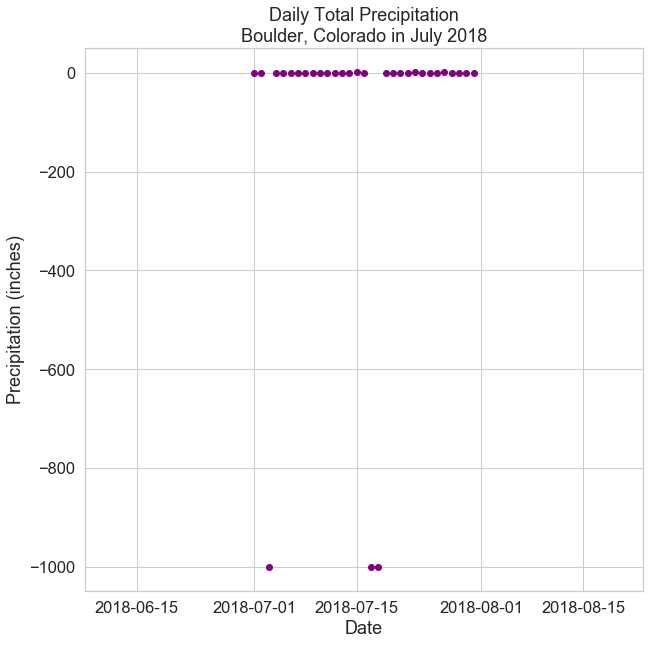

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

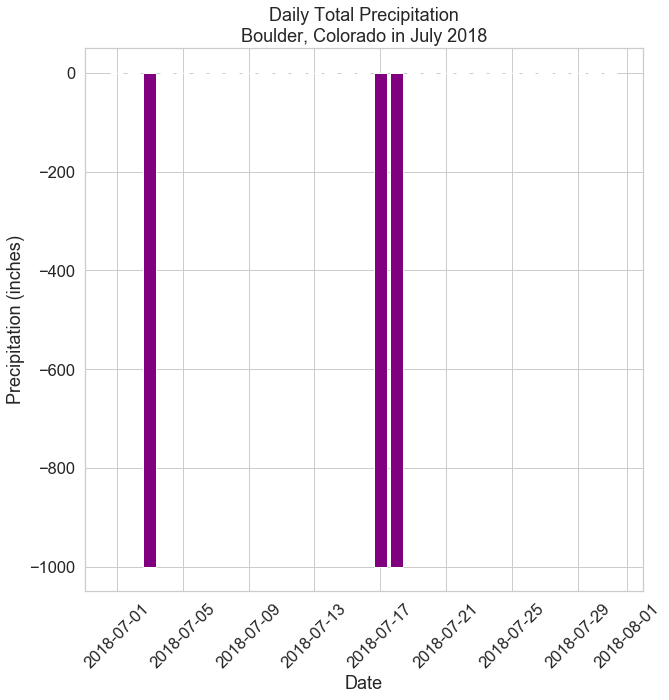

In [13]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

**Note:** you do not need to use `.values` when using an index that contains `float` values, rather than `datetime` objects, nor when creating a line graph using `ax.plot()`. 

However, for consistency of the code, the plot examples in this chapter will use `index.values` to create all plots using an index.

On later pages of this chapter, you will learn how to customize the date labels even more, such as displaying only month and day values or specifying the spacing for the time interval (i.e. frequency). 

## Work With No Data Values in Pandas Dataframe

As mentioned previously, you likely noticed that there are many negative values in this dataset, which are actually "no data" values. 

Sometimes data are missing from a file due to errors in collection, inability to record a data point, or other reasons. For example, imagine a spreadsheet with cells that are blank. If the cells are blank, you don't know for sure whether those data weren't collected, or whether someone forgot to fill them in. 

To account for data that are missing (not by mistake), you can put a value into those cells that represents "no data" to make it clear that these data are not usable for analysis or plotting.

Often, you'll find a dataset that uses a specific value for "no data". In many scientific disciplines, the value `-999` is often used to indicate "no data" values. 

In the example on this page, the data in `july-2018-temperature-precip.csv` contains "no data" values in the `precip` column using the value `-999`. 

If you do not specify that the value `-999` is the "no data" value, the values will be imported as real data, which will impact any statistics, calculations, and plots using the data.

For example, explore the data using `describe()` to see the impact of reading in those `-999` values as true values. 

In [14]:
# Both min and mean are affected by these negative, no data values
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,31.000000
mean,88.129032,-96.618065
std,6.626925,300.256388
min,75.000000,-999.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.050000
max,97.000000,0.450000


The `-999` values were imported as numeric values into the **pandas** dataframe when it was created, and thus, these values are included in the summary statistics. 

To ensure "no data" values are properly ignored in your summary statistics, you can specify a "no data" value during the import, so that those values are not read as true numeric values using the parameter `na_values` as follows: 

`na_values = value`

For example: 

`na_values = -999`

This will tell **pandas** to treat all values of `-999` as no data, and thus, not to include them in the analysis or on a plot. 

Now that you know how to handle "no data" values, recreate the dataframe once more by including a value for the parameter `na_values`. 

In [15]:
# Import data using datetime and no data value
boulder_july_2018 = pd.read_csv(file_path,
                                parse_dates=['date'],
                                index_col=['date'],
                                na_values=[-999])

boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


Notice that the `-999` value for `precip` on July 3rd has been replaced with `NaN` to indicate a "no data" value. 

Now have a look at the summary statistics.

In [16]:
# Both min and mean now accurately reflect the true data
boulder_july_2018.describe()

,max_temp,precip
count,31.000000,28.000000
mean,88.129032,0.065714
std,6.626925,0.120936
min,75.000000,0.000000
25%,84.000000,0.000000
50%,88.000000,0.000000
75%,94.000000,0.055000
max,97.000000,0.450000


Finally, plot the data one last time to see that the negative values `-999` are no longer on the plot.

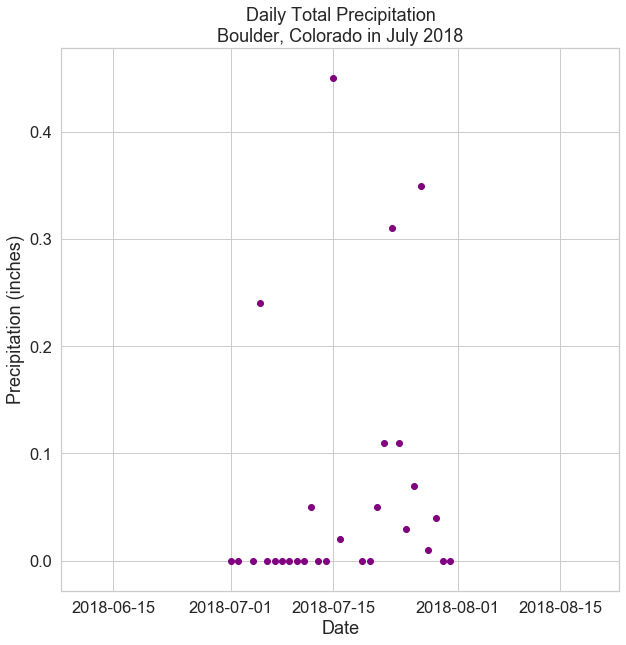

In [17]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

By using the `na_values` parameter, you told **Python** to ignore those "no data" values (which are now labeled as `NaN`) when it performs calculations on the data and when it plots the data. 

**Note**: if there are multiple types of missing values in your dataset, you can add multiple values in the `na_values` parameter as follows:

`na_values=['NA', ' ', -999])`

which would specify that the "no data" values are "NA" as a string, an empty space as a string, or the numeric value `-999`. 

You now know how to import dates into **pandas** dataframes using the `datetime` object in **Python** and how to deal with no data values. 

On the next pages of this chapter, you will learn more about working with `datetime` in **Python** to temporally subset and resample data as well as customize your plots even more.